<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Write your code here


# Write your code here
import nltk
nltk.download()








showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
reviews=pd.read_csv('reviews_.csv')
print(reviews)

                                                Reviews
0     Let's start with the positives.Most of the act...
1     I love everything about this movie, but especi...
2     This was the first Bollywood film I ever took ...
3     I can't remember the last time I've seen a com...
4     The film is almost every genre; its a fantasy,...
...                                                 ...
9995  I love this movie!It's action is superb in eve...
9996  Don't ask me for a plot, because I didn't have...
9997  A great movie of all time.. About vfx, storyli...
9998  I'm 33 and I could argue this is the best time...
9999  Up until Eega all his previous films are too c...

[10000 rows x 1 columns]


In [5]:
#Lower Case
reviews['After Converting to lower case'] = reviews['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews

#Punctuation Removal
reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]','')
reviews

#Special Charachters Removal
import re
reviews['After Removing Special Charachters'] = reviews['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
reviews

#Stopwords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['After Removing Stopwords'] =reviews['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews



/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/2450072497.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]','')


Reviews  \
0     Let's start with the positives.Most of the act...   
1     I love everything about this movie, but especi...   
2     This was the first Bollywood film I ever took ...   
3     I can't remember the last time I've seen a com...   
4     The film is almost every genre; its a fantasy,...   
...                                                 ...   
9995  I love this movie!It's action is superb in eve...   
9996  Don't ask me for a plot, because I didn't have...   
9997  A great movie of all time.. About vfx, storyli...   
9998  I'm 33 and I could argue this is the best time...   
9999  Up until Eega all his previous films are too c...   

                         After Converting to lower case  \
0     let's start with the positives.most of the act...   
1     i love everything about this movie, but especi...   
2     this was the first bollywood film i ever took ...   
3     i can't remember the last time i've seen a com...   
4     the film is almost every genre; its a fantasy,...   
...                                                 ...   
9995  i love this movie!it's action is superb in eve...   
9996  don't ask me for a plot, because i didn't have...   
9997  a great movie of all time.. about vfx, storyli...   
9998  i'm 33 and i could argue this is the best time...   
9999  up until eega all his previous films are too c...   

                             After Removing Punctuation  \
0     lets start with the positivesmost of the actio...   
1     i love everything about this movie but especia...   
2     this was the first bollywood film i ever took ...   
3     i cant remember the last time ive seen a comed...   
4     the film is almost every genre its a fantasy a...   
...                                                 ...   
9995  i love this movieits action is superb in every...   
9996  dont ask me for a plot because i didnt have a ...   
9997  a great movie of all time about vfx storyline ...   
9998  im 33 and i could argue this is the best time ...   
9999  up until eega all his previous films are too c...   

                     After Removing Special Charachters  \
0     lets start with the positivesmost of the actio...   
1     i love everything about this movie but especia...   
2     this was the first bollywood film i ever took ...   
3     i cant remember the last time ive seen a comed...   
4     the film is almost every genre its a fantasy a...   
...                                                 ...   
9995  i love this movieits action is superb in every...   
9996  dont ask me for a plot because i didnt have a ...   
9997  a great movie of all time about vfx storyline ...   
9998  im 33 and i could argue this is the best time ...   
9999  up until eega all his previous films are too c...   

                               After Removing Stopwords  
0     lets start positivesmost action scenes absolut...  
1     love everything movie especially message love ...  
2     first bollywood film ever took time sit watch ...  
3     cant remember last time ive seen comedy funny ...  
4     film almost every genre fantasy action histori...  
...                                                 ...  
9995  love movieits action superb every way making f...  
9996  dont ask plot didnt clue happening know absolu...  
9997  great movie time vfx storyline casting incredi...  
9998  im 33 could argue best time ever watching film...  
9999  eega previous films cliched gripping box offic...  

[10000 rows x 5 columns]

In [6]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

array= []
for i in reviews['After Removing Stopwords']:
  array.append(word_tokenize(i))
data_cleansing = [x for x in array if x != []]
repeated_words = list(itertools.chain.from_iterable(data_cleansing))

trigrams = nltk.trigrams(repeated_words)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('ive', 'ever', 'seen'): 1600, ('dance', 'action', 'scenes'): 1200, ('gay', 'love', 'story'): 800, ('would', 'typical', 'action'): 800, ('typical', 'action', 'movie'): 800, ('oscar', 'best', 'original'): 800, ('stands', 'rise', 'roar'): 800, ('rise', 'roar', 'revolt'): 800, ('alluri', 'sitarama', 'raju'): 800, ('rama', 'rao', 'jr'): 800, ...})

In [7]:
from collections import Counter
bg = nltk.bigrams(repeat)
FD = nltk.FreqDist(bg)
bgdicts = dict(FD)
for i in bgdicts:
  print( str(i) + ':' + str(bg_dict[i] / repeat.count(i[0])))

('lets', 'start'):1.0
('start', 'positivesmost'):0.3333333333333333
('positivesmost', 'action'):1.0
('action', 'scenes'):0.3225806451612903
('scenes', 'absolutely'):0.045454545454545456
('absolutely', 'glorious'):0.5
('glorious', 'inventive'):1.0
('inventive', 'exhilarating'):1.0
('exhilarating', 'ever'):1.0
('ever', 'put'):0.07692307692307693
('put', 'screensame'):0.3333333333333333
('screensame', 'goes'):1.0
('goes', 'dance'):1.0
('dance', 'numbers'):0.16666666666666666
('numbers', 'catchy'):0.5
('catchy', 'explosion'):1.0
('explosion', 'color'):0.25
('color', 'movement'):1.0
('movement', 'wonderful'):1.0
('wonderful', 'choreographyextremely'):0.5
('choreographyextremely', 'charismatic'):1.0
('charismatic', 'leads'):1.0
('leads', 'around'):0.1111111111111111
('around', 'except'):0.25
('except', 'two'):0.5
('two', 'white'):0.1111111111111111
('white', 'british'):1.0
('british', 'ladies'):0.07692307692307693
('ladies', 'ill'):1.0
('ill', 'get'):0.5
('get', 'later'):0.1
('later', 'stunt

('disappointment', 'without'):0.5
('without', 'dance'):0.5
('scenes', 'might'):0.045454545454545456
('might', 'rated'):0.25
('rated', 'movie'):1.0
('movie', '2'):0.017543859649122806
('2', '3'):0.2
('3', '10'):0.2
('10', 'since'):0.5
('since', 'action'):1.0
('action', 'dance'):0.03225806451612903
('dance', 'choreography'):0.08333333333333333
('choreography', 'undoubtedly'):0.14285714285714285
('undoubtedly', 'best'):1.0
('best', 'ever'):0.06666666666666667
('ever', 'seen'):0.6923076923076923
('seen', 'pulled'):0.06666666666666667
('pulled', 'otherwise'):1.0
('otherwise', 'melodramatic'):0.5
('melodramatic', 'militaristic'):1.0
('militaristic', 'nationalistic'):0.5
('nationalistic', 'protofascist'):0.5
('protofascist', 'tearjerker'):0.5
('tearjerker', 'gutter'):1.0
('gutter', '5'):1.0
('5', '10'):0.5
('10', 'stars'):0.5
('stars', 'love'):0.5
('love', 'everything'):0.058823529411764705
('everything', 'movie'):0.2857142857142857
('movie', 'especially'):0.017543859649122806
('especially', 

('quite', 'cheaprao'):0.16666666666666666
('cheaprao', 'charan'):1.0
('charan', 'good'):0.2
('good', 'particularly'):0.3333333333333333
('particularly', 'dance'):1.0
('scenes', 'stevenson'):0.045454545454545456
('stevenson', 'clearly'):0.3333333333333333
('clearly', 'ball'):0.3333333333333333
('ball', 'villainthe'):1.0
('villainthe', 'film'):1.0
('film', 'far'):0.02564102564102564
('far', 'long'):0.5
('long', 'way'):0.14285714285714285
('way', 'many'):0.07692307692307693
('many', 'flashbacks'):0.08333333333333333
('flashbacks', 'etc'):1.0
('etc', 'half'):0.3333333333333333
('half', 'could'):0.5
('could', 'cut'):0.125
('cut', 'itthe'):0.5
('itthe', 'film'):1.0
('film', 'also'):0.02564102564102564
('also', 'quite'):0.08333333333333333
('quite', 'racist'):0.16666666666666666
('racist', 'hindu'):0.5
('hindu', 'nationalist'):0.3333333333333333
('nationalist', 'excluding'):0.5
('excluding', 'muslims'):1.0
('muslims', 'gurkhas'):1.0
('gurkhas', 'racist'):1.0
('racist', 'depictions'):0.5
('dep

('movie', 'india'):0.017543859649122806
('india', 'give'):0.16666666666666666
('give', 'rrr'):0.3333333333333333
('rrr', '50'):0.07692307692307693
('50', 'stars'):1.0
('stars', '5'):0.5
('5', 'rrr'):0.5
('rrr', 'fiction'):0.07692307692307693
('fiction', 'kind'):1.0
('kind', 'takes'):0.25
('takes', 'creative'):0.3333333333333333
('creative', 'liberties'):0.3333333333333333
('liberties', 'couple'):1.0
('couple', 'wrong'):0.5
('wrong', 'ways'):0.3333333333333333
('ways', '2'):0.25
('2', 'lead'):0.2
('lead', 'charactersoverall'):1.0
('charactersoverall', 'theme'):1.0
('theme', 'story'):1.0
('story', 'line'):0.2222222222222222
('line', 'script'):0.25
('script', 'exceptions'):1.0
('exceptions', 'vfx'):0.5
('vfx', 'cinematography'):0.5
('cinematography', 'songs'):0.16666666666666666
('songs', 'choreography'):0.5
('choreography', 'actingetc'):0.14285714285714285
('actingetc', 'exceptionaldirector'):1.0
('exceptionaldirector', 'well'):1.0
('well', 'known'):0.1111111111111111
('known', 'skills')

('cinema', 'thinking'):0.14285714285714285
('thinking', 'watching'):1.0
('watching', 'movie'):0.4
('movie', 'much'):0.05263157894736842
('much', 'improvement'):0.09090909090909091
('improvement', 'compared'):1.0
('compared', 'soviet'):1.0
('soviet', 'nazi'):1.0
('nazi', 'propagandai'):1.0
('propagandai', 'strongly'):1.0
('strongly', 'recommend'):1.0
('recommend', 'watching'):1.0
('movie', 'entertained'):0.017543859649122806
('entertained', 'also'):1.0
('also', 'practice'):0.08333333333333333
('practice', 'media'):1.0
('media', 'analysis'):1.0
('analysis', 'great'):1.0
('great', 'subjectdont'):0.09090909090909091
('subjectdont', 'fooled'):1.0
('fooled', 'though'):1.0
('though', 'kind'):0.14285714285714285
('kind', 'ideology'):0.25
('ideology', 'one'):1.0
('one', 'single'):0.05
('single', 'authoritarian'):0.5
('authoritarian', 'normative'):1.0
('normative', 'vision'):1.0
('vision', 'last'):0.5
('last', 'song'):0.3333333333333333
('song', 'says'):0.16666666666666666
('says', 'one'):1.0
('

('awsome', 'performances'):1.0
('performances', 'ajay'):1.0
('ajay', 'devgan'):0.5
('devgan', 'marvellous'):1.0
('marvellous', 'loved'):1.0
('loved', 'watch'):0.25
('watch', 'many'):0.047619047619047616
('times', 'literally'):0.1111111111111111
('literally', 'found'):1.0
('found', 'indian'):0.3333333333333333
('film', 'one'):0.02564102564102564
('one', 'expensive'):0.05
('expensive', 'highest'):1.0
('highest', 'grossing'):1.0
('grossing', 'became'):1.0
('became', 'part'):1.0
('part', 'awards'):0.25
('awards', 'season'):0.5
('season', 'looked'):1.0
('looked', 'super'):0.5
('super', 'cool'):0.3333333333333333
('cool', 'clips'):0.25
('clips', 'shown'):1.0
('shown', 'bbc'):1.0
('bbc', 'review'):1.0
('review', 'show'):1.0
('show', 'title'):0.3333333333333333
('title', 'stands'):1.0
('revolt', 'basically'):0.3333333333333333
('basically', 'set'):1.0
('set', 'british'):0.5
('british', 'empire'):0.15384615384615385
('empire', 'ruling'):0.5
('ruling', 'india'):1.0
('india', 'early'):0.166666666

('forced', 'give'):1.0
('give', 'raju'):0.3333333333333333
('raju', 'promoted'):0.03571428571428571
('promoted', 'thwarting'):1.0
('thwarting', 'bheem'):1.0
('bheem', 'although'):0.03571428571428571
('although', 'racked'):0.5
('racked', 'guilt'):1.0
('guilt', 'actions'):1.0
('actions', 'recalling'):0.2
('recalling', 'pronationalistic'):1.0
('pronationalistic', 'background'):1.0
('background', 'alterego'):0.2
('alterego', 'mole'):1.0
('mole', 'within'):1.0
('within', 'police'):1.0
('police', 'wanted'):0.5
('wanted', 'promotion'):0.5
('promotion', 'gain'):1.0
('gain', 'access'):0.5
('access', 'gun'):1.0
('gun', 'shipments'):1.0
('shipments', 'smuggle'):1.0
('smuggle', 'village'):1.0
('village', 'fulfil'):1.0
('fulfil', 'promise'):1.0
('promise', 'made'):1.0
('made', 'dying'):0.14285714285714285
('dying', 'revolutionary'):1.0
('revolutionary', 'father'):0.5
('father', 'alluri'):1.0
('alluri', 'venkatarama'):0.3333333333333333
('venkatarama', 'raju'):1.0
('raju', 'ajay'):0.0357142857142857

('overthetop', 'fights'):0.5
('fights', 'violence'):0.5
('violence', 'highlights'):0.3333333333333333
('highlights', 'opening'):1.0
('opening', 'brawl'):1.0
('brawl', 'tiger'):1.0
('tiger', 'chase'):0.25
('chase', 'jungle'):1.0
('jungle', 'train'):0.5
('train', 'explosion'):0.3333333333333333
('explosion', 'bridge'):0.25
('bridge', 'rescue'):0.5
('rescue', 'naatu'):0.3333333333333333
('naatu', 'naatu'):0.5
('naatu', 'sequence'):0.16666666666666666
('sequence', 'climactic'):0.25
('climactic', 'explosive'):1.0
('explosive', 'fight'):1.0
('fight', 'featuring'):0.2
('featuring', 'motobike'):1.0
('motobike', 'rarely'):1.0
('rarely', 'slows'):1.0
('slows', 'threehour'):1.0
('threehour', 'runtime'):1.0
('runtime', 'brilliant'):0.5
('brilliant', 'score'):0.5
('score', 'keeravani'):0.5
('keeravani', 'including'):0.5
('including', 'energetic'):1.0
('energetic', 'song'):1.0
('dance', 'sequences'):0.08333333333333333
('sequences', 'breathtaking'):0.16666666666666666
('breathtaking', 'direction'):0

('typical', 'worst'):0.3333333333333333
('worst', 'adolescent'):1.0
('adolescent', 'literature'):1.0
('literature', 'big'):1.0
('big', 'indian'):0.5
('indian', 'productions'):0.06666666666666667
('productions', 'basic'):1.0
('basic', 'problem'):0.25
('problem', 'seem'):1.0
('seem', 'anchored'):0.2
('anchored', 'surprisingly'):1.0
('surprisingly', 'immature'):1.0
('immature', 'melodrama'):0.5
('melodrama', 'facing'):0.5
('facing', 'cinema'):0.5
('cinema', 'satyajit'):0.14285714285714285
('satyajit', 'ray'):1.0
('ray', 'exactlybritons'):0.5
('exactlybritons', 'comic'):1.0
('comic', 'cruelty'):1.0
('cruelty', 'steal'):1.0
('steal', 'girls'):1.0
('girls', 'coins'):1.0
('coins', 'beat'):1.0
('beat', 'begging'):1.0
('begging', 'women'):1.0
('women', 'death'):1.0
('death', 'wickedness'):0.5
('wickedness', 'comparable'):1.0
('comparable', 'ridiculousness'):1.0
('ridiculousness', 'intellectual'):1.0
('intellectual', 'military'):1.0
('military', 'social'):0.5
('social', 'sexual'):0.5
('sexual', 

('blunt', 'direct'):1.0
('direct', 'editing'):1.0
('editing', 'fast'):0.5
('fast', 'confusingthe'):0.5
('confusingthe', 'length'):1.0
('length', 'makes'):1.0
('makes', 'feel'):0.125
('feel', 'bloated'):0.5
('bloated', 'like'):1.0
('like', 'could'):0.0625
('could', 'ended'):0.125
('ended', 'way'):0.5
('way', 'sooner'):0.07692307692307693
('sooner', 'end'):1.0
('end', 'doubt'):0.2
('doubt', 'would'):1.0
('would', 'carethis'):0.1111111111111111
('carethis', 'movie'):1.0
('much', 'enjoy'):0.09090909090909091
('enjoy', 'flaws'):0.3333333333333333
('flaws', 'least'):1.0
('least', 'memorable'):0.3333333333333333
('memorable', 'dont'):1.0
('dont', 'ask'):0.1111111111111111
('ask', 'plot'):1.0
('plot', 'didnt'):0.14285714285714285
('didnt', 'clue'):0.2
('clue', 'happening'):1.0
('happening', 'know'):1.0
('know', 'absolutely'):0.1111111111111111
('absolutely', 'loved'):0.5
('loved', 'watchedill'):0.25
('watchedill', 'admit'):1.0
('admit', 'captivated'):1.0
('captivated', 'day'):1.0
('day', 'watc

('periodthe', 'intention'):1.0
('intention', 'film'):0.5
('film', 'serious'):0.02564102564102564
('serious', 'doesnt'):1.0
('doesnt', 'pose'):0.3333333333333333
('pose', 'simply'):1.0
('simply', 'compare'):0.5
('compare', 'movie'):1.0
('movie', 'biggest'):0.017543859649122806
('biggest', 'fun'):1.0
('fun', 'rollercoaster'):0.2
('ride', 'ever'):0.3333333333333333
('ever', 'life'):0.07692307692307693
('life', 'someone'):0.2
('someone', 'always'):0.3333333333333333
('always', 'likes'):0.5
('likes', 'grounded'):1.0
('grounded', 'reality'):1.0
('reality', 'films'):0.25
('films', 'cup'):0.1111111111111111
('cup', 'tea'):1.0
('tea', 'skip'):1.0
('skip', 'itfor'):1.0
('itfor', 'movie'):1.0
('movie', 'enthusiasts'):0.017543859649122806
('enthusiasts', 'blast'):1.0
('blast', 'movie'):1.0
('movie', 'regret'):0.017543859649122806
('regret', 'watching'):1.0
('film', 'first'):0.02564102564102564
('didnt', 'bring'):0.2
('bring', 'anyone'):0.3333333333333333
('anyone', 'watch'):0.3333333333333333
('fi

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [8]:

import math
sentences = reviews["After Removing Stopwords"].values.tolist()
words = set([j for i in sentences for j in i.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count=1

def tfIdf(x,sentence):
  value = sentence.count(x)
  size = len(sentence.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0
    
for sentence in sentences:
  tfIdf["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
  count=count+1
tf_idf_df











/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/_w/fq5vhpw11hg7shqr9xjzlx840000gn/T/ipykernel_7076/3908837426.py:16: PerformanceWarning: 

words   Review1   Review2  Review3  Review4   Review5  Review6  \
0        number  0.019443  0.000000      0.0      0.0  0.000000      0.0   
1     hyderabad  0.000000  0.000000      0.0      0.0  0.000000      0.0   
2        whilst  0.000000  0.000000      0.0      0.0  0.000000      0.0   
3             5  0.008015  0.000000      0.0      0.0  0.000000      0.0   
4       wowthis  0.000000  0.000000      0.0      0.0  0.000000      0.0   
...         ...       ...       ...      ...      ...       ...      ...   
1677       date  0.000000  0.000000      0.0      0.0  0.000000      0.0   
1678    figured  0.000000  0.000000      0.0      0.0  0.000000      0.0   
1679       even  0.033079  0.020991      0.0      0.0  0.018426      0.0   
1680   computer  0.000000  0.000000      0.0      0.0  0.000000      0.0   
1681      keeps  0.000000  0.000000      0.0      0.0  0.000000      0.0   

       Review7  Review8  Review9  ...  Review9991  Review9992  Review9993  \
0     0.000000      0.0      0.0  ...         0.0         0.0    0.000000   
1     0.000000      0.0      0.0  ...         0.0         0.0    0.000000   
2     0.000000      0.0      0.0  ...         0.0         0.0    0.000000   
3     0.024623      0.0      0.0  ...         0.0         0.0    0.000000   
4     0.000000      0.0      0.0  ...         0.0         0.0    0.000000   
...        ...      ...      ...  ...         ...         ...         ...   
1677  0.014279      0.0      0.0  ...         0.0         0.0    0.000000   
1678  0.000000      0.0      0.0  ...         0.0         0.0    0.000000   
1679  0.024623      0.0      0.0  ...         0.0         0.0    0.013776   
1680  0.000000      0.0      0.0  ...         0.0         0.0    0.013776   
1681  0.000000      0.0      0.0  ...         0.0         0.0    0.000000   

      Review9994  Review9995  Review9996  Review9997  Review9998  Review9999  \
0            0.0    0.000000    0.000000    0.000000    0.019395    0.000000   
1            0.0    0.000000    0.000000    0.000000    0.019395    0.000000   
2            0.0    0.000000    0.000000    0.000000    0.019395    0.000000   
3            0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
4            0.0    0.000000    0.000000    0.018558    0.000000    0.000000   
...          ...         ...         ...         ...         ...         ...   
1677         0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
1678         0.0    0.028222    0.000000    0.000000    0.000000    0.000000   
1679         0.0    0.000000    0.000000    0.042662    0.000000    0.019922   
1680         0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
1681         0.0    0.000000    0.030404    0.000000    0.000000    0.000000   

      Review10000  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
1677          0.0  
1678          0.0  
1679          0.0  
1680          0.0  
1681          0.0  

[1682 rows x 10001 columns]

In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

search_sentence="  Excellent movie, All the actors did a fabulous work."
X_list = word_tokenize(search_sentence)

stop_words = stopwords.words('english') 
X_set = {i for i in X_list if not i in stop_words}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for j in r_vector: 
      if j in X_set: l1.append(1)
      else: list1.append(0) 
      if j in Y_set: l2.append(1) 
      else: list2.append(0)
  return r_vector, l1, l2

def cc(rvector, l1, l2):
  count = 0
  for i in range(len(rvector)): 
        count+= l1[i]*l2[i] 
  c = count / float((sum(l1)*sum(l2))**0.5) 
  return c


list3 = []
for l in reviews['After Removing Stopwords']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['Reviews'],list3)), columns=['Reviews','cosine cimilarity'])
Data2

Reviews  cosine cimilarity
0     Let's start with the positives.Most of the act...           0.045361
1     I love everything about this movie, but especi...           0.039778
2     This was the first Bollywood film I ever took ...           0.049029
3     I can't remember the last time I've seen a com...           0.045644
4     The film is almost every genre; its a fantasy,...           0.000000
...                                                 ...                ...
9995  I love this movie!It's action is superb in eve...           0.098058
9996  Don't ask me for a plot, because I didn't have...           0.035898
9997  A great movie of all time.. About vfx, storyli...           0.036274
9998  I'm 33 and I could argue this is the best time...           0.056796
9999  Up until Eega all his previous films are too c...           0.000000

[10000 rows x 2 columns]

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [10]:
!pip install --upgrade gensim

import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [11]:
documents = [word.split() for word in reviews['After Removing Stopwords'] if str(word) != 'nan' and str(word) != '']
mod = models.Word2Vec(documents,vector_size=300)
words = list(mod.wv.index_to_key)
print(words)

['movie', 'film', 'action', 'raju', 'bheem', 'scenes', 'watch', 'one', 'story', 'love', 'like', 'seen', 'best', 'indian', 'british', 'even', 'ever', 'rrr', 'way', 'time', 'dance', 'also', 'many', 'great', 'really', 'much', 'characters', 'rajamouli', 'get', 'well', 'would', 'know', 'films', 'ive', 'dont', 'leads', 'people', 'times', 'two', 'makes', 'evil', 'could', 'malli', 'however', 'plot', 'things', 'scott', 'everything', 'cinema', 'see', 'made', 'though', 'choreography', 'long', 'friendship', 'movies', 'every', 'song', 'rajus', 'sequences', 'first', 'india', 'acting', 'naatu', 'little', 'quite', 'watched', 'actors', 'cinematography', 'bheems', 'lot', 'thats', 'enough', 'think', 'actually', 'scotts', 'end', 'special', 'entertaining', 'wild', 'animals', 'sure', 'effects', 'music', 'actions', 'life', 'rama', 'dancing', 'charan', 'hours', 'direction', 'watching', '3', 'never', 'superb', 'didnt', 'make', 'background', 'lacchu', '2', 'fun', 'im', 'want', 'fight', 'seem', 'cgi', 'epic', 'v

In [12]:
model.wv.save_word2vec_format('model.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('model.bin')
print(model)

Word2Vec<vocab=1682, vector_size=300, alpha=0.025>


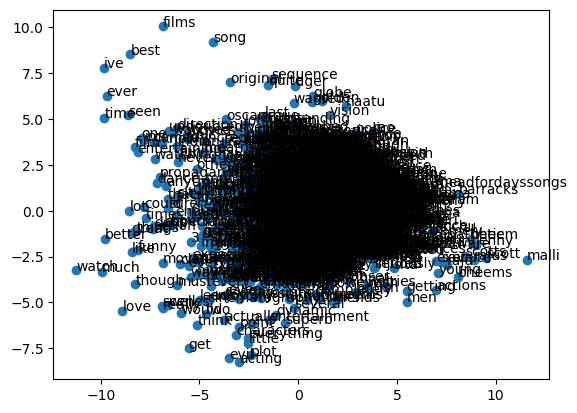

In [13]:
mod = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
res = pca.fit_transform(mod)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [14]:
# The GitHub link of your final csv file



# Link:



